<a href="https://colab.research.google.com/github/Maxxx-VS/The-Founder/blob/master/36_3_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ваша задача, как тимлида проекта, самостоятельно, не прибегая к помощи куратора:
1. Разобраться в работе кода.
2. Найти датасет с изображениями и подписи к ним.
3. Обучить модель по картинкам делать описание.
4. Продемонстрировать работу модели.

In [1]:
%%capture
!pip install keras

In [2]:
import numpy as np
import pandas as pd
import random
import kagglehub

from keras.models import Model
from keras.layers import Input, LSTM, Dense, Embedding, Concatenate
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input
from keras.preprocessing import image
from keras.models import Model
import os

import warnings
warnings.filterwarnings("ignore")

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
path = kagglehub.dataset_download("adityajn105/flickr30k")
print("Path to dataset files:", path)

100%|██████████| 8.16G/8.16G [01:32<00:00, 94.3MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/adityajn105/flickr30k/versions/1


In [4]:
image_path = '/root/.cache/kagglehub/datasets/adityajn105/flickr30k/versions/1/Images/'
data = pd.read_csv('/root/.cache/kagglehub/datasets/adityajn105/flickr30k/versions/1/captions.txt')

In [5]:
data.head(3)

,image,caption
0,1000092795.jpg,Two young guys with shaggy hair look at their...
1,1000092795.jpg,"Two young , White males are outside near many..."
2,1000092795.jpg,Two men in green shirts are standing in a yard .


In [6]:
data.tail(2)

,image,caption
158913,998845445.jpg,"A man riding a small boat in a harbor , with ..."
158914,998845445.jpg,A man on a moored blue and white boat with hi...


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158915 entries, 0 to 158914
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   image    158915 non-null  object
 1   caption  158914 non-null  object
dtypes: object(2)
memory usage: 2.4+ MB


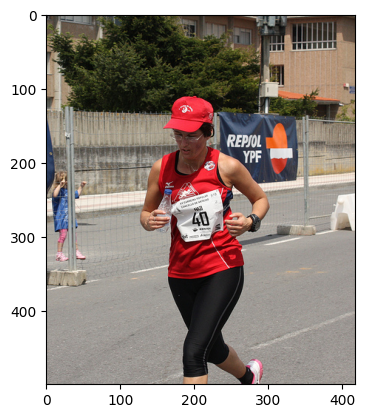


 Caption:  A female is running a race where she wears the number 40 and appears to be drinking a bottle of water .


In [8]:
data_idx = random.randint(0, len(data)-1)

image = image_path + data.iloc[data_idx,0]
rnd_img = mpimg.imread(image)
plt.imshow(rnd_img)
plt.show()

for i in range(data_idx, data_idx+1):
    print('\n', "Caption:", data.iloc[i,1])

In [9]:
# загрузка предобученной модели InceptionV3
base_model = InceptionV3(weights='imagenet')
model = Model(base_model.input, base_model.layers[-2].output)

def extract_features(img_path, model):
    img = image.load_img(images_path, target_size=(299, 299))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    features = model.predict(x)
    return features

96112376/96112376 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [10]:
# чтение данных
captions_data_path = '/root/.cache/kagglehub/datasets/adityajn105/flickr30k/versions/1/captions.txt'
images_path = '/root/.cache/kagglehub/datasets/adityajn105/flickr30k/versions/1/Images/'

captions = open(captions_data_path, 'r').read().strip().split('\n')

image_ids = []
captions_list = []


for line in captions:
    all_line = line.split(',')
    image_ids.append(all_line[0])
    captions_list.append(all_line[1])

In [11]:
print(image_ids[1])
print(captions_list[1], '\n')
print(image_ids[-1])
print(captions_list[-1])

1000092795.jpg
 Two young guys with shaggy hair look at their hands while hanging out in the yard . 

998845445.jpg
 A man on a moored blue and white boat with hills and mist in the background .


In [12]:
# токенизация
caption_tokenizer = Tokenizer()
caption_tokenizer.fit_on_texts(captions_list)
caption_sequences = caption_tokenizer.texts_to_sequences(captions_list)
caption_word_index = caption_tokenizer.word_index

In [13]:
print(caption_word_index)

{'a': 1, 'in': 2, 'the': 3, 'on': 4, 'man': 5, 'is': 6, 'and': 7, 'of': 8, 'with': 9, 'woman': 10, 'two': 11, 'are': 12, 'people': 13, 'to': 14, 'at': 15, 'an': 16, 'wearing': 17, 'young': 18, 'shirt': 19, 'white': 20, 'black': 21, 'his': 22, 'while': 23, 'blue': 24, 'girl': 25, 'men': 26, 'boy': 27, 'red': 28, 'sitting': 29, 'dog': 30, 'standing': 31, 'playing': 32, 'group': 33, 'street': 34, 'down': 35, 'walking': 36, 'front': 37, 'her': 38, 'holding': 39, 'three': 40, 'water': 41, 'women': 42, 'by': 43, 'child': 44, 'up': 45, 'little': 46, 'green': 47, 'looking': 48, 'for': 49, 'large': 50, 'outside': 51, 'person': 52, 'as': 53, 'children': 54, 'brown': 55, 'through': 56, 'yellow': 57, 'small': 58, 'their': 59, 'from': 60, 'hat': 61, 'ball': 62, 'one': 63, 'into': 64, 'next': 65, 'over': 66, 'running': 67, 'riding': 68, 'out': 69, 'building': 70, 'some': 71, 'dressed': 72, 'jacket': 73, 'around': 74, 'another': 75, 'other': 76, 'orange': 77, 'field': 78, 'beach': 79, 'crowd': 80, 'n

In [14]:
# паддинг последовательностей
max_len_caption = max([len(txt) for txt in caption_sequences])
decoder_input_data = pad_sequences(caption_sequences, maxlen=max_len_caption, padding='post')

In [15]:
# смещение на один токен вправо для decoder_target_data
decoder_target_data = np.zeros((len(captions_list), max_len_caption, len(caption_word_index) + 1), dtype='float32')
for i, seqs in enumerate(caption_sequences):
    for t, token in enumerate(seqs):
        if t > 0:
            decoder_target_data[i, t - 1, token] = 1.0

In [16]:
# экстракция признаков изображений
image_features = np.zeros((len(image_ids), 2048))
for i, img_id in enumerate(image_ids):
    img_path = images_path + img_id
    image_features[i] = extract_features(img_path, model)

AttributeError: 'str' object has no attribute 'load_img'

In [ ]:
# гиперпараметры
latent_dim = 256
num_decoder_tokens = len(caption_word_index) + 1

# вход для признаков изображения
image_input = Input(shape=(2048,))

# вход для декодера
decoder_inputs = Input(shape=(None,))
decoder_embedding = Embedding(input_dim=num_decoder_tokens, output_dim=latent_dim)(decoder_inputs)
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_embedding, initial_state=[image_input, image_input])
decoder_dense = Dense(num_decoder_tokens, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

# модель Seq2Seq
model = Model([image_input, decoder_inputs], decoder_outputs)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy')
model.fit([image_features, decoder_input_data], decoder_target_data, batch_size=64, epochs=30, validation_split=0.2)